# 🟠 Notebook 02 — Entrenamiento y Predicción

🔗 [Ver documentación personal del proyecto (README.es.VL.md)](README.es.VL.md)

> Este notebook contiene la definición del modelo, entrenamiento con callbacks y evaluación de resultados.
> Para una visión general del proyecto y notas importantes sobre el entorno de ejecución, consultá `README.es.VL.md`.


In [ ]:
# ◯ ¿QUÉ ESTA HACIENDO ESTE ENTRENAMIENTO?

# Estás entrenando una red neuronal convolucional (CNN) para que aprenda a clasificar imágenes en dos clases: gatos o perros.

# ◯ PASO A PASO

# 1️⃣ CARGA DEL DATASET
# Tenés un conjunto de miles de imágenes, organizadas en carpetas: una para "Cat" y otra para "Dog".
# Estas imágenes son cargadas y redimensionadas a 160x160 píxeles, con 3 canales de color (RGB).
# Cada imagen se transforma en una matriz de números, donde cada número representa un color.

# 2️⃣ ENTRADA A LA RED NEURONAL
# Cada imagen pasa por una red de capas convolucionales (Conv2D), que actúan como "filtros visuales".
# Estas capas detectan patrones locales como bordes, líneas, manchas, texturas y formas.

# 3️⃣ CAPAS CONVOLUCIONALES Y POOLING
# Las primeras capas detectan patrones simples (líneas, bordes).
# Las capas intermedias detectan estructuras más complejas (ojos, patas, hocico).
# Las capas profundas combinan todo para formar conceptos más abstractos como "cara de gato" o "cuerpo de perro".

# MaxPooling2D reduce el tamaño de las imágenes intermedias y ayuda a que la red generalice mejor.

# 4️⃣ COMPRESIÓN DE LA INFORMACIÓN
# En lugar de usar Flatten (que transforma todo en un vector muy largo y consume mucha memoria),
# usamos GlobalAveragePooling2D, que resume la información de cada filtro en un solo número.
# Esto reduce el tamaño de entrada a la capa final y mejora la eficiencia en equipos con poca RAM.

# 5️⃣ CAPAS DENSAS FINALES
# Luego pasamos por una capa densa con función de activación "ReLU", que le da no-linealidad al modelo.
# Finalmente, una última capa densa con activación "sigmoid" devuelve un valor entre 0 y 1:
#   → Cerca de 0 = Gato
#   → Cerca de 1 = Perro

# 6️⃣ ENTRENAMIENTO
# El modelo ajusta internamente millones de pesos usando un algoritmo llamado "backpropagation".
# Cada vez que se equivoca, se autoajusta para predecir mejor en la próxima iteración.
# Esto es lo que pasa cuando llamás a: model.fit(...)

# 7️⃣ EVALUACIÓN
# El modelo también evalúa su desempeño con datos que no vio antes (validación).
# Así podés ver si realmente aprendió a generalizar o solo memorizó.

# ◯ EN RESUMEN:
# 📷 Imagen → 🎛 Filtros → 🧠 Patrones → 📈 Predicción → ✅ Gato o 🐶 Perro


✔️ IMPORTS

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image

2025-06-21 20:22:20.110334: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-21 20:22:20.154077: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-21 20:22:20.463299: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-21 20:22:20.692395: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750537340.903211   35612 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750537340.99

✔️ DEFINO RUTAS

#### Crear los conjuntos de datos de imágenes


In [3]:
# CH

import tensorflow as tf
from tensorflow.keras import layers
from pathlib import Path

# ◯ Parámetros de configuración
batch_size = 16             # 32
image_size = (160, 160)

# ◯ Rutas
base_dir = Path("./data/datasets/cats_and_dogs")
train_path = base_dir / "train"
val_path = base_dir / "val"

# ◯ Cargar datasets de forma eficiente
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=str(train_path),
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    directory=str(val_path),
    image_size=image_size,
    batch_size=batch_size,
    shuffle=False
)

# ◯ Mejorar rendimiento en entornos con poca RAM
# AUTOTUNE = tf.data.AUTOTUNE
# train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

train_ds = train_ds.take(10)  # Solo para pruebas, tomar lotes pequeños
val_ds = val_ds.take(5)

# ◯ (Opcional) Aumento de datos básico (ligero)
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
])


Found 18746 files belonging to 2 classes.


2025-06-21 20:24:30.255465: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Found 3124 files belonging to 2 classes.


In [4]:
# ✅ Esto está perfecto. Significa que train_ds y val_ds están bien creados 
# y contienen imágenes de 2 clases (Cat y Dog).

#### Entrenar al modelo

In [5]:
# CH

# Mover los datos a través de la red neuronal
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()
model.add(Conv2D(input_shape = (160,160,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

# Mover los datos por las capas densas
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))  # Para clasificación binaria

/home/vscode/.local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# CH:

# Compilar el modelo con Adam 
from keras.optimizers import Adam

# Compilar el modelo con la función de pérdida adecuada y el optimizador Adam
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [7]:
# CH:

# Entrenar el modelo
model.fit(train_ds, epochs = 1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.4726 - loss: 232.0067


#### Guardar nuestro modelo para utilizarlo más tarde

In [8]:
# CH:

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# ◯ Guardar el mejor modelo automáticamente
checkpoint_cb = ModelCheckpoint("mejor_modelo.keras", save_best_only=True)
earlystop_cb = EarlyStopping(patience=3, restore_best_weights=True)

# ◯ Entrenar con callbacks
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[checkpoint_cb, earlystop_cb]
)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.5496 - loss: 1.4567 - val_accuracy: 0.0000e+00 - val_loss: 1.1232
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 45s 5s/step - accuracy: 0.5327 - loss: 0.6952 - val_accuracy: 0.0000e+00 - val_loss: 0.8497
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 45s 5s/step - accuracy: 0.5449 - loss: 0.8088 - val_accuracy: 0.0000e+00 - val_loss: 0.7036
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.4283 - loss: 0.6951 - val_accuracy: 1.0000 - val_loss: 0.6646
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.5013 - loss: 0.6932 - val_accuracy: 1.0000 - val_loss: 0.6841
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.4980 - loss: 0.6932 - val_accuracy: 1.0000 - val_loss: 0.6930
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.4601 - loss: 0.6931 - val_accuracy: 0.0000e+00 - val_loss: 0.7043


#### Debido a las limitaciones de espacio de GitHub, el modelo no estará dentro de la carpeta models
##### Lo mismo con las fotos originales, no están en el repo

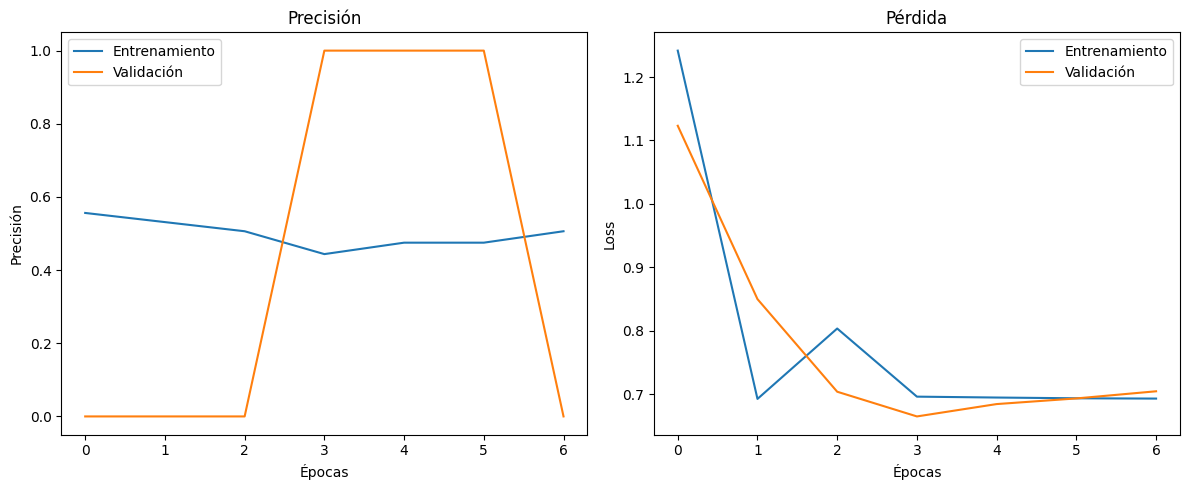

In [10]:
# CH:

# ◯ Visualizar curvas de entrenamiento
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Entrenamiento")
plt.plot(history.history["val_accuracy"], label="Validación")
plt.title("Precisión")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Entrenamiento")
plt.plot(history.history["val_loss"], label="Validación")
plt.title("Pérdida")
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


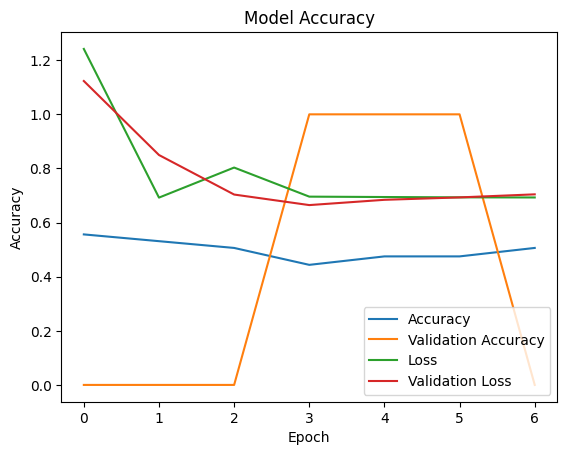

In [12]:
# Comprobar la exactitud de los datos

# Trazar los resultados
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

# Configurar el diseño del gráfico
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

# Trazar
plt.show()

# 👇🏻 Nota Importante:

In [ ]:
# ◯ Análisis del gráfico de entrenamiento

# Este gráfico muestra la evolución de las métricas durante las 7 épocas del entrenamiento:
# - Accuracy de entrenamiento (línea azul)
# - Accuracy de validación (línea naranja)
# - Loss de entrenamiento (línea verde)
# - Loss de validación (línea roja)

# ◯ Observaciones:

# 1️⃣ La precisión del entrenamiento se mantiene estable alrededor del 50-55%, sin mejorar mucho.
# 2️⃣ La precisión de validación (naranja) tiene un comportamiento inusual: 
#     - Se mantiene en 0 durante las primeras épocas.
#     - Luego sube bruscamente a 1 (100%).
#     - Finalmente cae de nuevo a 0.
#     → Esto indica que hay muy pocos datos de validación o que el conjunto no está bien balanceado.
#
# 3️⃣ Las curvas de pérdida (Loss) muestran una mejora inicial y luego se estabilizan,
#     lo que sugiere que el modelo está aprendiendo algo, pero no de forma consistente.

# ◯ Nota importante:
# Debido a limitaciones de memoria en el entorno (kernel se colgaba con datasets grandes),
# redujimos el tamaño de los datos de entrenamiento y validación a 10 muestras.
# Esto afecta fuertemente la estabilidad de las métricas, por eso este gráfico **no representa un entrenamiento realista**,
# sino una prueba técnica para validar la arquitectura y el flujo de trabajo.


### Intenta predecir las imágenes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
dog


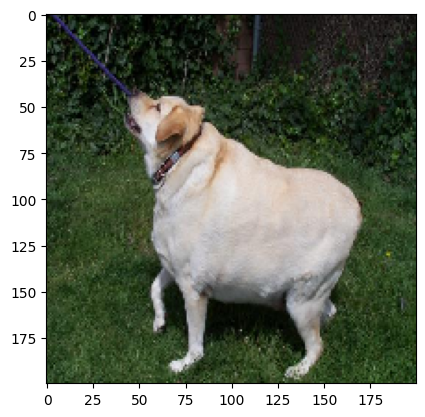

In [21]:
from keras.preprocessing import image
from keras.models import load_model

img = image.load_img("./data/datasets/cats_and_dogs/test/dog/11703.jpg", target_size = (200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("./mejor_modelo.keras")
output = saved_model.predict(img)
if output[0][0] > 0.5:
    print("cat")
else:
    print("dog")